In [1]:
import pandas as pd 
import numpy as np

C:\Users\quirozdj\AppData\Local\Temp\ipykernel_13576\4018586642.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [110]:
from sklearn import metrics
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd


class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred
  
  

def loadData():
    X = np.load('X_metrics.npy')
    y = np.load('y_metrics.npy')

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=40)
    return X_test, y_test


def thereshold_vector(vector, threshold):
    return np.where(vector < threshold, 0, 1)


def LoadModel():
    model =  tf.keras.models.load_model('TrainingSplit\ModeloSplit90T.h5')
    model.summary()
    return model

def TensorToVector(res,y_test):
    pred =[]
    test = []
    for i in res:
        pred.append(np.argmax(i))
    for j in y_test:
        test.append(np.argmax(j))
    return pred, test

def ConfusionMatrix(pred, test, actions):
        # Ejemplo de una matriz de confusión
    # Reemplaza estas predicciones y etiquetas verdaderas con las tuyas


    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(pred, test)

    # Etiquetas de las clases


    # Crear la figura y el eje
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)

    # Añadir etiquetas y título
    plt.xlabel('Predicción')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión')

    # Mostrar la matriz de confusión
    plt.show()
def metrics_plot(test, pred, actions):
    # Calculate the recall, F1 score and precision for each class
    recall_scores = recall_score(test, pred, average=None)
    f1_scores = f1_score(test, pred, average=None)
    precision_scores = metrics.precision_score(test, pred, average=None)

    # Create the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot the recall, F1 score and precision scores
    barWidth = 0.25
    r1 = np.arange(len(actions))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    plt.bar(r1, recall_scores, color='blue', width=barWidth, edgecolor='grey', label='Recall')
    plt.bar(r2, f1_scores, color='green', width=barWidth, edgecolor='grey', label='F1 Score')
    plt.bar(r3, precision_scores, color='red', width=barWidth, edgecolor='grey', label='Precision')

    # Add xticks on the middle of the group bars
    plt.xlabel('Class', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(recall_scores))], actions)

    # Add labels and title
    plt.ylabel('Score')
    plt.title('Recall, F1 Score and Precision per Class')

    # Create legend & Show graphic
    plt.legend()
    plt.show()


In [75]:
metrics20T = pd.read_csv('metrics20T.csv')
#print(metrics20T)
metrics40T = pd.read_csv('metrics40T.csv')
#print(metrics40T)
metrics60T = pd.read_csv('metrics60T.csv')
#print(metrics60T)
metrics70T = pd.read_csv('metrics70T.csv')
#print(metrics70T)
metrics80T = pd.read_csv('metrics80T.csv')
#print(metrics80T)
metrics90T = pd.read_csv('metrics90T.csv')
print(metrics90T)

  Unnamed: 0  Alerta de Caída  Sentándose  Levantándose  Sentado  Caminando  \
0  precision              1.0         1.0           1.0      1.0        1.0   
1     recall              1.0         1.0           1.0      1.0        1.0   
2   f1-score              1.0         1.0           1.0      1.0        1.0   
3    support             16.0         9.0           3.0      8.0        5.0   

   accuracy  macro avg  weighted avg  
0       1.0        1.0           1.0  
1       1.0        1.0           1.0  
2       1.0        1.0           1.0  
3       1.0       41.0          41.0  


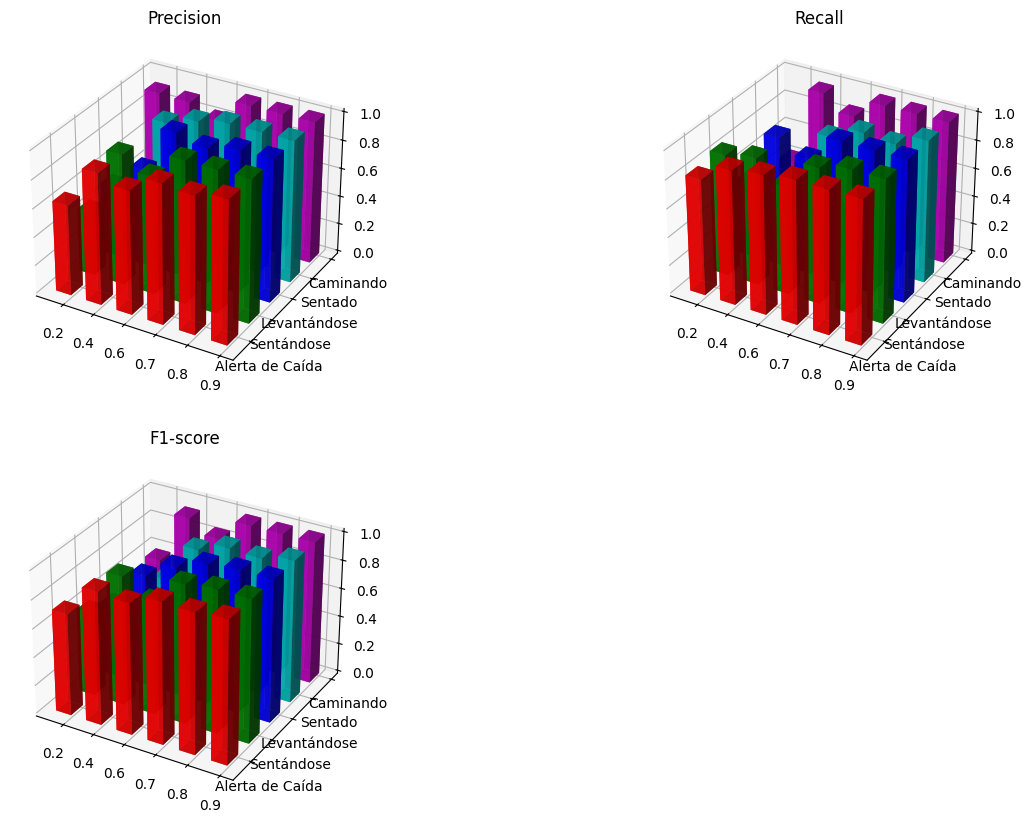

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza esto con tus datos reales)
proporciones = [0.2, 0.4, 0.6, 0.7, 0.8, 0.9]
clases = ['Alerta de Caída', 'Sentándose', 'Levantándose', 'Sentado', 'Caminando']
precision = np.array([[0.6375, 0.921569,  0.866667, 0.977273, 0.961538, 1.00000], 
                      [0.450549, 0.916667 ,  0.826087, 1.000000, 1.0 ,1.0 ], 
                      [0.500000 , 0.681818,  1.000000, 0.956522, 1.0, 1.0], 
                      [0, 0.888889,  0.956522, 1.000000 , 1.0, 1.0],
                        [0.920000, 0.911111, 0.833333 , 1.000000,1.0,1.0 ]])

recall = np.array([[0.816000, 0.940000, 0.970149 , 1.000000, 1.000000, 1.0 ],
                    [0.854167  , 0.891892, 0.760000 , 0.950000, 1.0, 1.0], 
                    [0.520833 ,  0.909091, 0.818182 , 1.000000,1.0, 1.0],
                      [0.0, 0.484848 , 0.846154, 0.937500,0.91766, 1.0], 
                      [0.425926, 0.976190,0.869565, 1.00000,1.0, 1.0]])
f1_score = np.array([[0.715789, 0.930693,  0.915493, 0.988506,0.980392,1.0 ],
                      [0.589928 , 0.904110 , 0.791667 , 0.974359, 1.0, 1.0], 
                      [0.510204, 0.779221,  0.900000 , 0.977778, 1.0, 1.0], 
                      [0.0, 0.627451 ,0.897959 , 0.967742 , 0.956522,1.0], 
                      [0.582278, 0.942529 , 0.851064 ,  1.0,1.0, 1.0]])

# Preparar datos para el gráfico
x = np.arange(len(proporciones))
y = np.arange(len(clases))
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
Z_precision = precision.flatten()
Z_recall = recall.flatten()
Z_f1_score = f1_score.flatten()

# Colores para las clases
colors = ['r', 'g', 'b', 'c', 'm']

# Crear la figura y los subplots
fig = plt.figure(figsize=(15, 10))

# Ancho de las barras
width = 0.5

# Gráfico para Precision
ax_precision = fig.add_subplot(2, 2, 1, projection='3d')
for i, clase in enumerate(clases):
    ax_precision.bar3d(X[Y == i], Y[Y == i], np.zeros_like(Z_precision[Y == i]), width, width, Z_precision[Y == i], color=colors[i], alpha=0.8)
ax_precision.set_title('Precision')
ax_precision.set_xticks(np.arange(len(proporciones)) + 0.5)
ax_precision.set_xticklabels(proporciones)
ax_precision.set_yticks(np.arange(len(clases)) + 0.5)
ax_precision.set_yticklabels(clases)

# Gráfico para Recall
ax_recall = fig.add_subplot(2, 2, 2, projection='3d')
for i, clase in enumerate(clases):
    ax_recall.bar3d(X[Y == i], Y[Y == i], np.zeros_like(Z_recall[Y == i]), width, width, Z_recall[Y == i], color=colors[i], alpha=0.8)
ax_recall.set_title('Recall')
ax_recall.set_xticks(np.arange(len(proporciones)) + 0.5)
ax_recall.set_xticklabels(proporciones)
ax_recall.set_yticks(np.arange(len(clases)) + 0.5)
ax_recall.set_yticklabels(clases)

# Gráfico para F1-score
ax_f1_score = fig.add_subplot(2, 2, 3, projection='3d')
for i, clase in enumerate(clases):
    ax_f1_score.bar3d(X[Y == i], Y[Y == i], np.zeros_like(Z_f1_score[Y == i]), width, width, Z_f1_score[Y == i], color=colors[i], alpha=0.8)
ax_f1_score.set_title('F1-score')
ax_f1_score.set_xticks(np.arange(len(proporciones)) + 0.5)
ax_f1_score.set_xticklabels(proporciones)
ax_f1_score.set_yticks(np.arange(len(clases)) + 0.5)
ax_f1_score.set_yticklabels(clases)

plt.show()





[[1.       0.961538 0.977273 0.866667 0.921569 0.6375  ]
 [1.       1.       1.       0.826087 0.916667 0.450549]
 [1.       1.       0.956522 1.       0.681818 0.5     ]
 [1.       1.       1.       0.956522 0.888889 0.      ]
 [1.       1.       1.       0.833333 0.911111 0.92    ]]


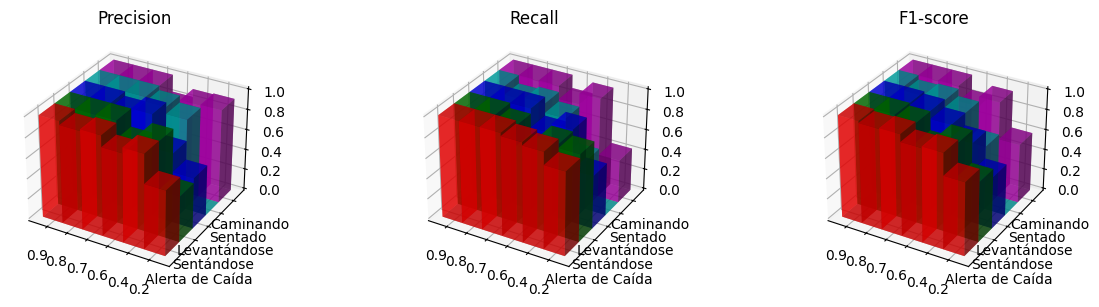

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza esto con tus datos reales)
proporciones = np.flip([0.2, 0.4, 0.6, 0.7, 0.8, 0.9])
clases = ['Alerta de Caída', 'Sentándose', 'Levantándose', 'Sentado', 'Caminando']
precision = np.array([np.flip([0.6375, 0.921569,  0.866667, 0.977273, 0.961538, 1.00000]), 
                      np.flip([0.450549, 0.916667 ,  0.826087, 1.000000, 1.0 ,1.0 ]), 
                      np.flip([0.500000 , 0.681818,  1.000000, 0.956522, 1.0, 1.0]), 
                      np.flip([0, 0.888889,  0.956522, 1.000000 , 1.0, 1.0]),
                        np.flip([0.920000, 0.911111, 0.833333 , 1.000000,1.0,1.0 ])])

print(precision)

recall = np.array([np.flip([0.816000, 0.940000, 0.970149 , 1.000000, 1.000000, 1.0 ]),
                    np.flip([0.854167  , 0.891892, 0.760000 , 0.950000, 1.0, 1.0]), 
                    np.flip([0.520833 ,  0.909091, 0.818182 , 1.000000,1.0, 1.0]),
                      np.flip([0.0, 0.484848 , 0.846154, 0.937500,0.91766, 1.0]), 
                      np.flip([0.425926, 0.976190,0.869565, 1.00000,1.0, 1.0])])
f1_score = np.array([np.flip([0.715789, 0.930693,  0.915493, 0.988506,0.980392,1.0 ]),
                      np.flip([0.589928 , 0.904110 , 0.791667 , 0.974359, 1.0, 1.0]), 
                      np.flip([0.510204, 0.779221,  0.900000 , 0.977778, 1.0, 1.0]), 
                      np.flip([0.0, 0.627451 ,0.897959 , 0.967742 , 0.956522,1.0]), 
                      np.flip([0.582278, 0.942529 , 0.851064 ,  1.0,1.0, 1.0])])

# Preparar datos para el gráfico
x = np.arange(len(proporciones))
y = np.arange(len(clases))
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
Z_precision = precision.flatten()
Z_recall = recall.flatten()
Z_f1_score = f1_score.flatten()

# Colores para las clases
colors = ['r', 'g', 'b', 'c', 'm']

# Crear la figura y los subplots
fig = plt.figure(figsize=(15, 10))

# Ancho de las barras
width = 1
plt.subplots_adjust(wspace=0.1)
# Gráfico para Precision
ax_precision = fig.add_subplot(3, 3, 1, projection='3d')
for i, clase in enumerate(clases):
    ax_precision.bar3d(X[Y == i], Y[Y == i], np.zeros_like(Z_precision[Y == i]), width, width, Z_precision[Y == i], color=colors[i], alpha=0.6)
ax_precision.set_title('Precision')
ax_precision.set_xticks(np.arange(len(proporciones)) + 0.5)
ax_precision.set_xticklabels(proporciones)
ax_precision.set_yticks(np.arange(len(clases)) + 0.5)
ax_precision.set_yticklabels(clases)

# Gráfico para Recall
ax_recall = fig.add_subplot(3, 3, 2, projection='3d')
for i, clase in enumerate(clases):
    ax_recall.bar3d(X[Y == i], Y[Y == i], np.zeros_like(Z_recall[Y == i]), width, width, Z_recall[Y == i], color=colors[i], alpha=0.6)
ax_recall.set_title('Recall')
ax_recall.set_xticks(np.arange(len(proporciones)) + 0.5)
ax_recall.set_xticklabels(proporciones)
ax_recall.set_yticks(np.arange(len(clases)) + 0.5)
ax_recall.set_yticklabels(clases)

# Gráfico para F1-score
ax_f1_score = fig.add_subplot(3, 3, 3, projection='3d')
for i, clase in enumerate(clases):
    ax_f1_score.bar3d(X[Y == i], Y[Y == i], np.zeros_like(Z_f1_score[Y == i]), width, width, Z_f1_score[Y == i], color=colors[i], alpha=0.6)
ax_f1_score.set_title('F1-score')
ax_f1_score.set_xticks(np.arange(len(proporciones)) + 0.5)
ax_f1_score.set_xticklabels(proporciones)
ax_f1_score.set_yticks(np.arange(len(clases)) + 0.5)
ax_f1_score.set_yticklabels(clases)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)

plt.show()


[[1.       0.961538 0.977273 0.866667 0.921569 0.6375  ]
 [1.       1.       1.       0.826087 0.916667 0.450549]
 [1.       1.       0.956522 1.       0.681818 0.5     ]
 [1.       1.       1.       0.956522 0.888889 0.      ]
 [1.       1.       1.       0.833333 0.911111 0.92    ]]


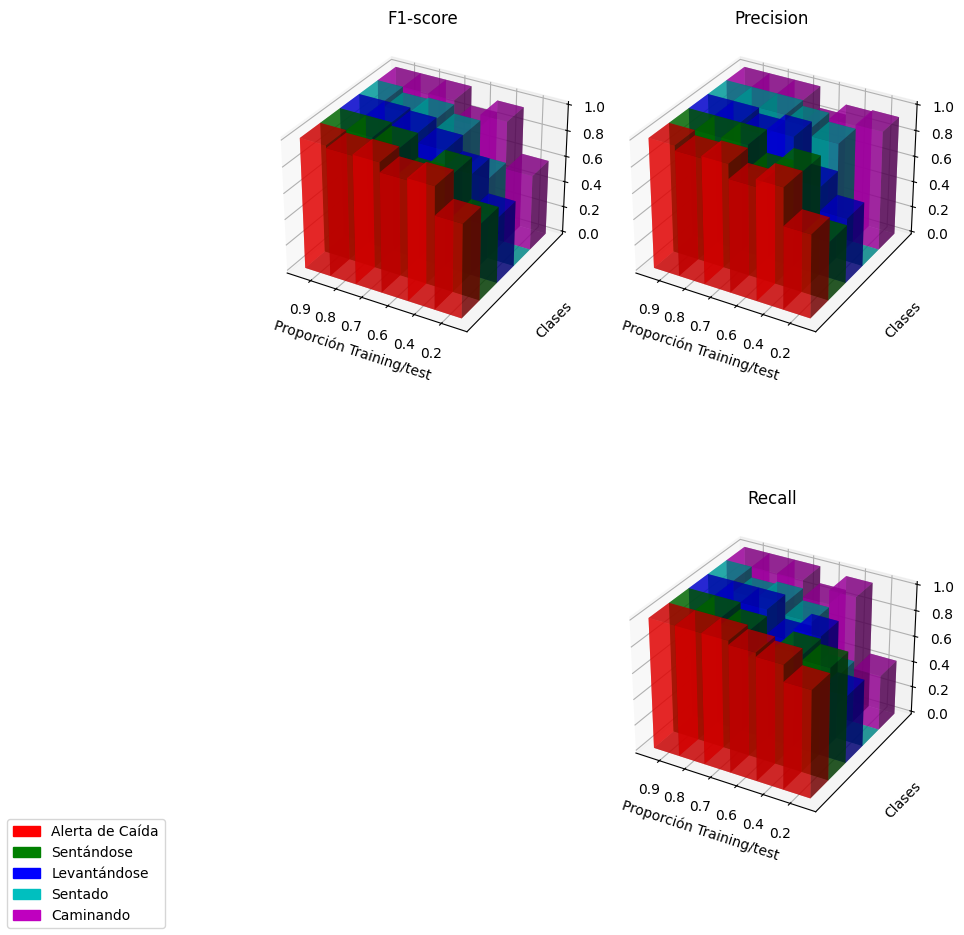

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza esto con tus datos reales)
proporciones = np.flip([0.2, 0.4, 0.6, 0.7, 0.8, 0.9])
clases = ['Alerta de Caída', 'Sentándose', 'Levantándose', 'Sentado', 'Caminando']
precision = np.array([np.flip([0.6375, 0.921569,  0.866667, 0.977273, 0.961538, 1.00000]), 
                      np.flip([0.450549, 0.916667 ,  0.826087, 1.000000, 1.0 ,1.0 ]), 
                      np.flip([0.500000 , 0.681818,  1.000000, 0.956522, 1.0, 1.0]), 
                      np.flip([0, 0.888889,  0.956522, 1.000000 , 1.0, 1.0]),
                      np.flip([0.920000, 0.911111, 0.833333 , 1.000000,1.0,1.0 ])])

print(precision)

recall = np.array([np.flip([0.816000, 0.940000, 0.970149 , 1.000000, 1.000000, 1.0 ]),
                    np.flip([0.854167  , 0.891892, 0.760000 , 0.950000, 1.0, 1.0]), 
                    np.flip([0.520833 ,  0.909091, 0.818182 , 1.000000,1.0, 1.0]),
                      np.flip([0.0, 0.484848 , 0.846154, 0.937500,0.91766, 1.0]), 
                      np.flip([0.425926, 0.976190,0.869565, 1.00000,1.0, 1.0])])
f1_score = np.array([np.flip([0.715789, 0.930693,  0.915493, 0.988506,0.980392,1.0 ]),
                      np.flip([0.589928 , 0.904110 , 0.791667 , 0.974359, 1.0, 1.0]), 
                      np.flip([0.510204, 0.779221,  0.900000 , 0.977778, 1.0, 1.0]), 
                      np.flip([0.0, 0.627451 ,0.897959 , 0.967742 , 0.956522,1.0]), 
                      np.flip([0.582278, 0.942529 , 0.851064 ,  1.0,1.0, 1.0])])

# Preparar datos para el gráfico
x = np.arange(len(proporciones))
y = np.arange(len(clases))
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
Z_precision = precision.flatten()
Z_recall = recall.flatten()
Z_f1_score = f1_score.flatten()

# Colores para las clases
colors = ['r', 'g', 'b', 'c', 'm']

# Crear la figura y los subplots
fig = plt.figure(figsize=(15, 10))

# Ancho de las barras
width = 1
#plt.subplots_adjust(wspace=0.1)

# Gráfico para Precision
ax_precision = fig.add_subplot(2, 1, 1, projection='3d')
for i, clase in enumerate(clases):
    ax_precision.bar3d(X[Y == i], Y[Y == i], np.zeros_like(Z_precision[Y == i]), width, width, Z_precision[Y == i], color=colors[i], alpha=0.6)
ax_precision.set_title('Precision')
ax_precision.set_xticks(np.arange(len(proporciones)) + 0.5)
ax_precision.set_xticklabels(proporciones)
ax_precision.set_yticks([])
ax_precision.set_ylabel('Clases')
ax_precision.set_xlabel('Proporción Training/test')

# Gráfico para Recall
ax_recall = fig.add_subplot(2, 1, 2, projection='3d')
for i, clase in enumerate(clases):
    ax_recall.bar3d(X[Y == i], Y[Y == i], np.zeros_like(Z_recall[Y == i]), width, width, Z_recall[Y == i], color=colors[i], alpha=0.6)
ax_recall.set_title('Recall')
ax_recall.set_xticks(np.arange(len(proporciones)) + 0.5)
ax_recall.set_xticklabels(proporciones)
ax_recall.set_yticks([])
ax_recall.set_xlabel('Proporción Training/test')
ax_recall.set_ylabel('Clases')

# Leyenda
legend_labels = ['Alerta de Caída', 'Sentándose', 'Levantándose', 'Sentado', 'Caminando']
legend_colors = ['r', 'g', 'b', 'c', 'm']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
fig.legend(legend_handles, legend_labels, loc='lower left')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)

plt.show()


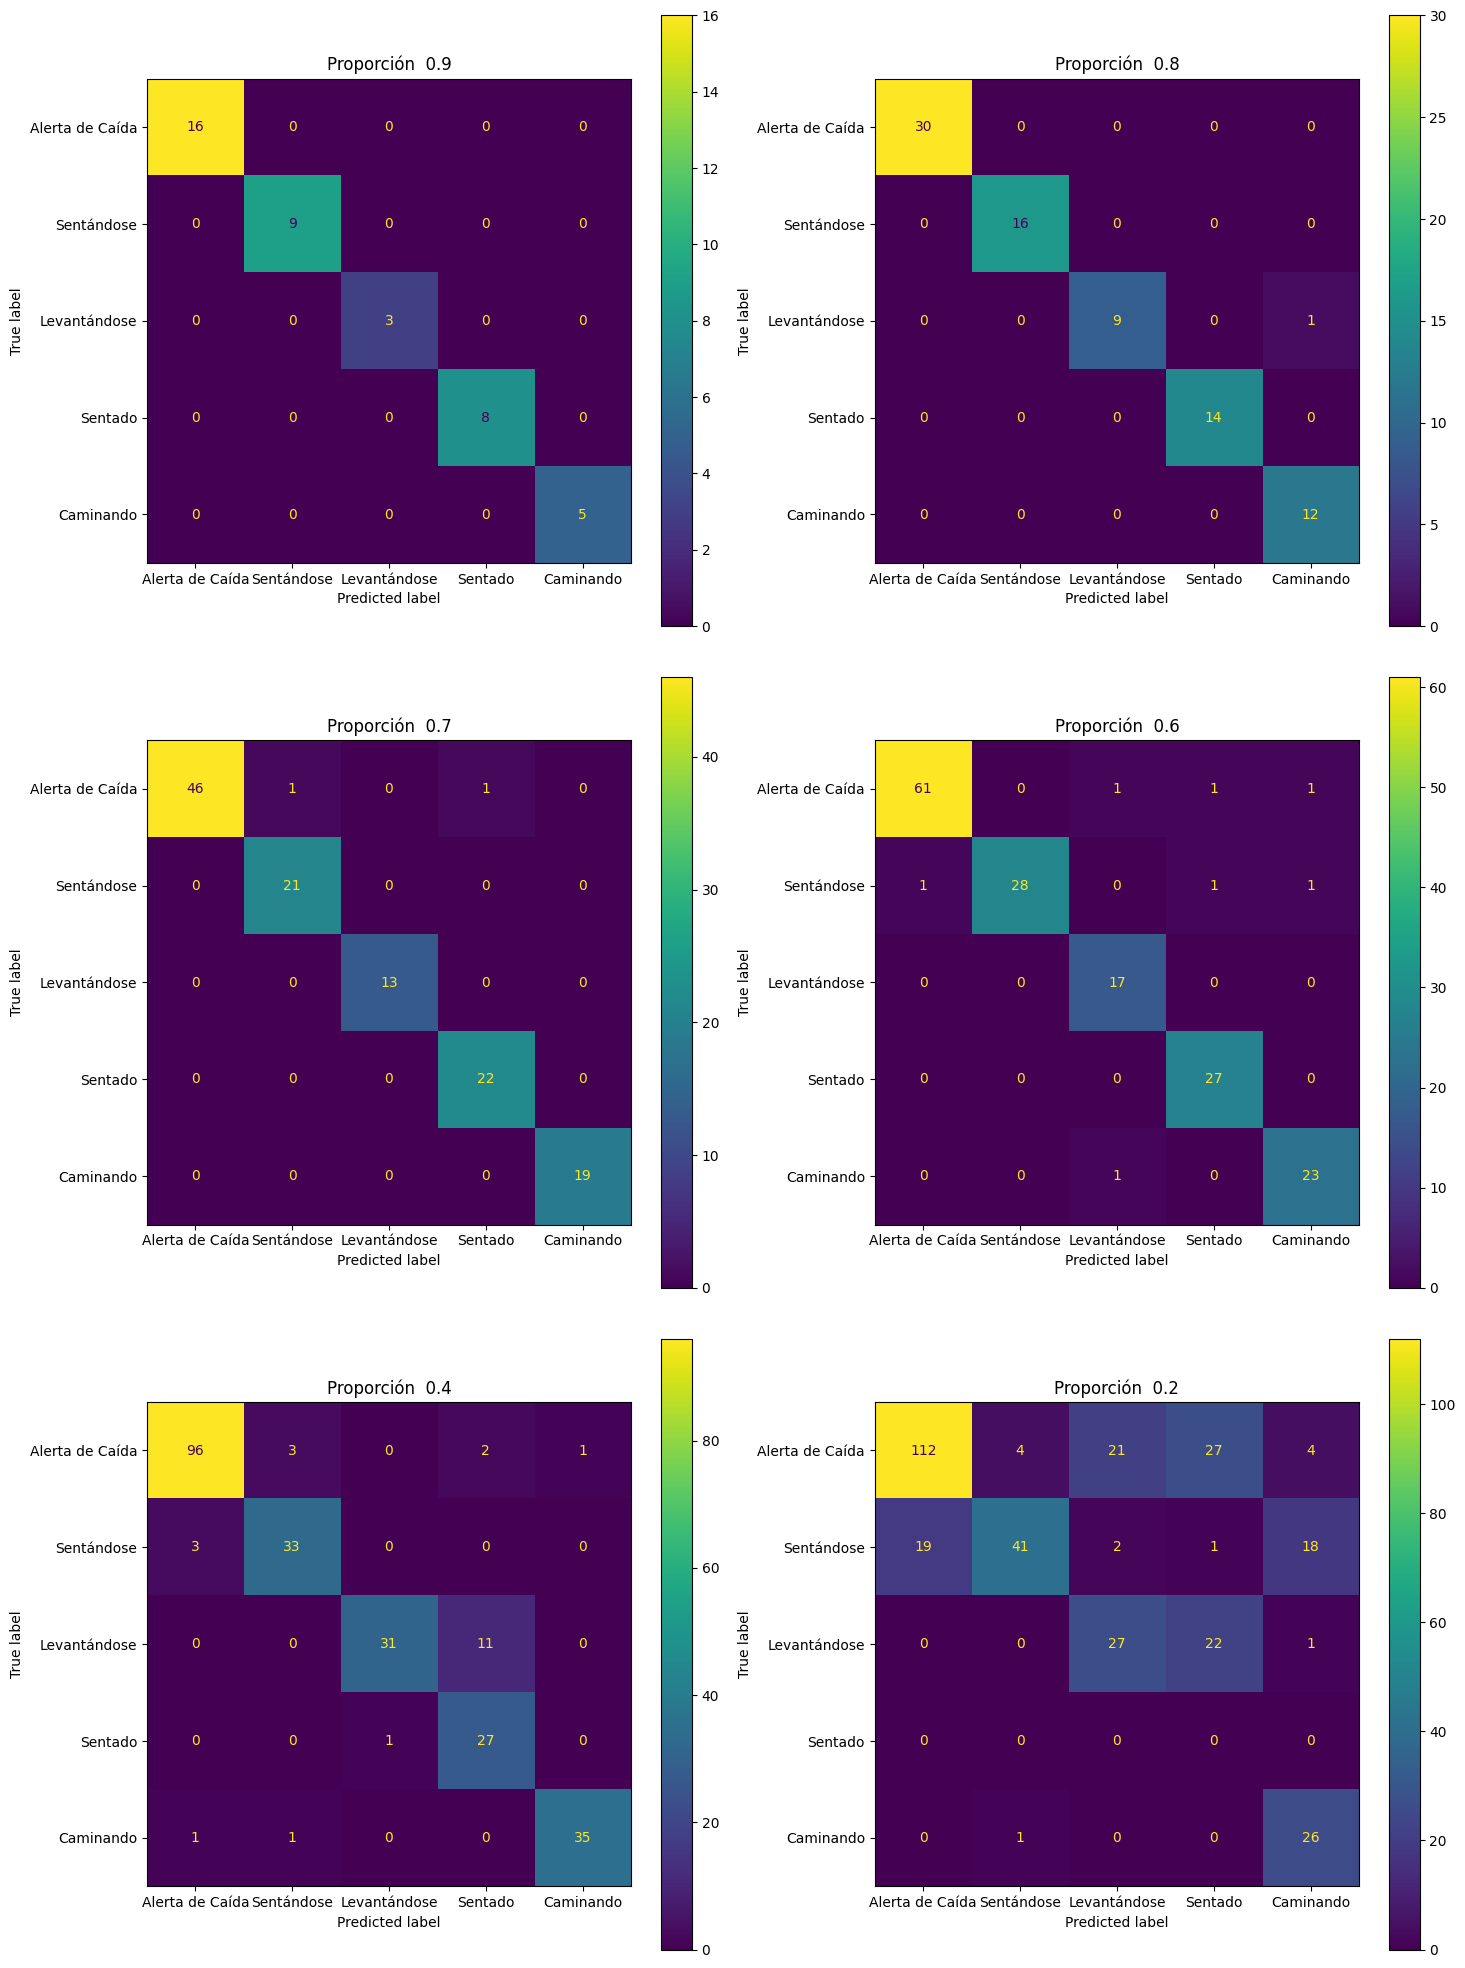

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define las matrices de confusión para cada división
confusion_matrices = [
    np.array([[16, 0, 0, 0, 0],
              [0, 9, 0, 0, 0],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 8, 0],
              [0, 0, 0, 0, 5]]),
    np.array([[30, 0, 0, 0, 0],
              [0, 16, 0, 0, 0],
              [0, 0, 9, 0, 1],
              [0, 0, 0, 14, 0],
              [0, 0, 0, 0, 12]]),
    np.array([[46, 1, 0, 1, 0],
              [0, 21, 0, 0, 0],
              [0, 0, 13, 0, 0],
              [0, 0, 0, 22, 0],
              [0, 0, 0, 0, 19]]),
    np.array([[61, 0, 1, 1, 1],
              [1, 28, 0, 1, 1],
              [0, 0, 17, 0, 0],
              [0, 0, 0, 27, 0],
              [0, 0, 1, 0, 23]]),
    np.array([[96, 3, 0, 2, 1],
              [3, 33, 0, 0, 0],
              [0, 0, 31, 11, 0],
              [0, 0, 1, 27, 0],
              [1, 1, 0, 0, 35]]),
    np.array([[112, 4, 21, 27, 4],
              [19, 41, 2, 1, 18],
              [0, 0, 27, 22, 1],
              [0, 0, 0, 0, 0],
              [0, 1, 0, 0, 26]])
]

# Define el tamaño de la cuadrícula
num_rows = 3
num_cols = 2

actions = np.array(['Alerta de Caída',
                        'Sentándose',
                        'Levantándose',
                        'Sentado',
                        'Caminando'])
proportion = np.flip([0.2, 0.4, 0.6, 0.7, 0.8, 0.9])
# Crea una figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,20))

# Itera sobre las matrices de confusión y dibuja cada una en su subplot correspondiente
for i, ax in enumerate(axes.flatten()):
    if i < len(confusion_matrices):
        disp = ConfusionMatrixDisplay(confusion_matrices[i], display_labels=[f'{actions[j]}' for j in range(5)])
        disp.plot(ax=ax)
        ax.set_title(f'Proporción  {proportion[i]}')

# Oculta los subplots que no se usan
for i in range(len(confusion_matrices), num_rows*num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()




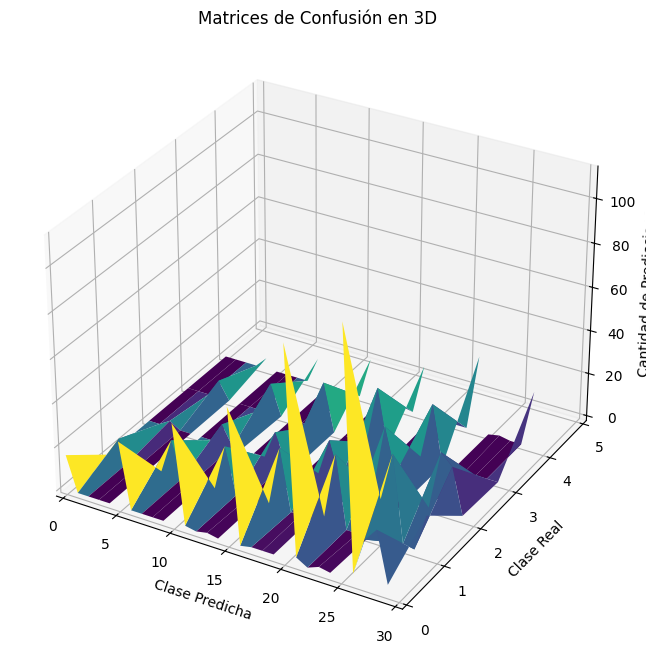